In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

plt.rcParams['axes.formatter.useoffset'] = False

In [18]:
# Open the data and get a subset
hdulist = fits.open('/grp/hst/hstlc/hst13902/outputs/composite/V-KL-UMA_FUV_G160M_1600_curve.fits', mode='readonly')
subset = np.where(56853 < hdulist[1].data['mjd'])
all_counts = hdulist[1].data['gross'] #use flux for longer timescales, otherwise use net
all_times = hdulist[1].data['mjd']
counts, times = [], []
for count, time in zip(all_counts, all_times):
    if 56853.930 < time < 56853.955:
        counts.append(count)
        times.append(time)

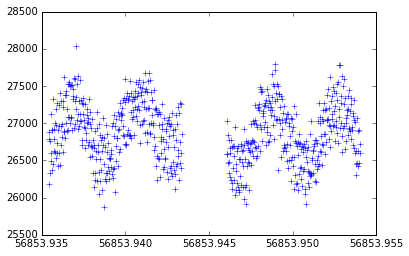

In [3]:
# Plot the sample
fig, ax = plt.subplots()
ax.plot(times, counts, 'b+')

**It appears that this object has a period of ~0.004 days, or ~6 minutes**

## Lomb-Scargle Periodogram via scipy

In [4]:
from scipy.signal import lombscargle

In [5]:
periods = np.linspace(0.001, 0.01, len(times))
ang_freqs = 2 * np.pi / periods
power = lombscargle(np.asarray(times), np.asarray(counts) - np.asarray(counts).mean(), ang_freqs)
N = len(times)
power *= 2 / (N * np.asarray(counts).std() ** 2)

 (0.0, 0.01),

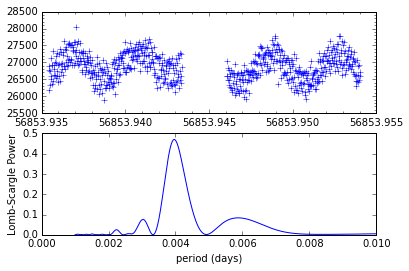

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.minorticks_on()
ax1.plot(times, counts, 'b+')
ax2.plot(periods, power)
ax2.set(xlim=(0.0, 0.01), xlabel='period (days)', ylabel='Lomb-Scargle Power')

## Lomb-Scargle Periodogram via gatspy

In [7]:
from gatspy.periodic import LombScargleFast

In [8]:
model = LombScargleFast().fit(times, counts)
periods, power = model.periodogram_auto(nyquist_factor=len(times))

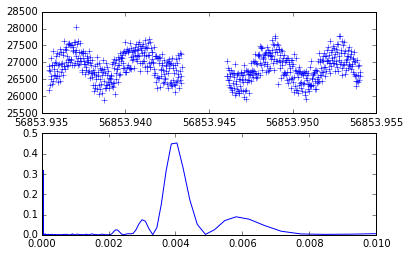

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(times, counts, 'b+')
ax2.plot(periods, power, linewidth=1.0)
ax2.set_xlim((0.0, 0.01))
ax2.set_ylim((0.0, 0.5))
ax2.set_xlabel='period (days)'
ax2.set_ylabel='Lomb-Scargle Power'

In [10]:
model.optimizer.period_range=(0.001, 0.01)
period = model.best_period
print period

Finding optimal frequency:
 - Estimated peak width = 338
 - Using 5 steps per peak; omega_step = 67.6
 - User-specified period range:  0.001 to 0.01
 - Computing periods at 85 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
0.00395903778046


## Lomb-Scargle Periodogram via astroML

In [11]:
from astroML.time_series import lomb_scargle

In [12]:
errors = [0.0001 for item in counts]
periods = np.linspace(0.001, 0.01, len(times))
power = lomb_scargle(times, counts, errors, ang_freqs)

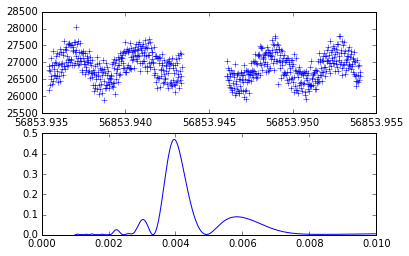

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(times, counts, 'b+')
ax2.plot(periods, power, linewidth=1.0)
ax2.set_xlim((0.0, 0.01))
ax2.set_ylim((0.0, 0.5))
ax2.set_xlabel='period (days)'
ax2.set_ylabel='Lomb-Scargle Power'

## Try with more data!

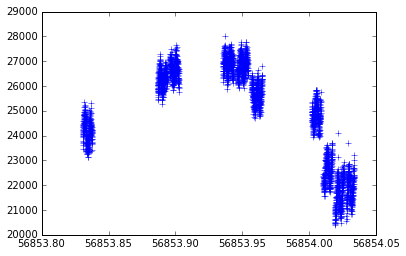

In [22]:
# Open the data and get a subset
counts, times = [], []
for count, time in zip(all_counts, all_times):
    if time > 56500:
        counts.append(count)
        times.append(time)

fig, ax = plt.subplots()
ax.plot(times, counts, 'b+')

In [26]:
periods = np.linspace(0.001, 0.01, len(times))
ang_freqs = 2 * np.pi / periods
power = lombscargle(np.asarray(times), np.asarray(counts) - np.asarray(counts).mean(), ang_freqs)
N = len(times)
power *= 2 / (N * np.asarray(counts).std() ** 2)

 (0.0, 0.07),

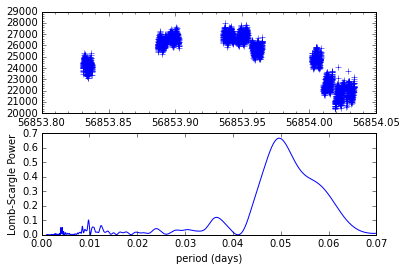

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.minorticks_on()
ax1.plot(times, counts, 'b+')
ax2.plot(periods, power)
ax2.set(xlim=(0.0, 0.01), xlabel='period (days)', ylabel='Lomb-Scargle Power')

Some things to try:
+ Use flux (for longer timescales) or net, instead of gross
+ Restrict frequencies to > than sampling time and < length of a few orbits
+ Find peaks, subtract them out, and iterate again to find residual peaks